## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [27]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [29]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_unit=10, num_neur=[512,256,128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neur):
        if i == 0:
            x = keras.layers.Dense(units=n, 
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n, 
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)
        
    out = keras.layers.Dense(units=output_unit, 
                                  activation='softmax',
                                  name='output')(x)
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [47]:
results = {}

for regulier_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulier_ratio))
    model=build_mlp(input_shape=x_train.shape[1:],l1_ratio=regulier_ratio)
    model.summary()
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer= optimizer)
    
    model.fit(x_train,y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    #Collect data
    train_loss=model.history.history['loss']
    vali_loss=model.history.history['val_loss']
    train_acc=model.history.history['accuracy']
    vali_acc=model.history.history['val_accuracy']
    
    exp_name_tag='exp_l1={}'.format(regulier_ratio)
    results[exp_name_tag]={'train_loss':train_loss,
                           'vali_loss':vali_loss,
                           'train_acc':train_acc,
                           'vali_acc' :vali_acc}
                                    

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 10s 198us/step - loss: 2.4626 - accuracy: 0.0967 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________

50000/50000 [==============================] - 10s 192us/step - loss: 2.8355 - accuracy: 0.6149 - val_loss: 3.0503 - val_accuracy: 0.5357
Epoch 46/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.7936 - accuracy: 0.6185 - val_loss: 3.0276 - val_accuracy: 0.5341
Epoch 47/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.7530 - accuracy: 0.6219 - val_loss: 3.0558 - val_accuracy: 0.5108
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.7191 - accuracy: 0.6217 - val_loss: 3.0345 - val_accuracy: 0.5124
Epoch 49/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.6805 - accuracy: 0.6227 - val_loss: 2.9587 - val_accuracy: 0.5245
Epoch 50/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.6414 - accuracy: 0.6223 - val_loss: 2.9243 - val_accuracy: 0.5234
Experiment with Regulizer = 0.000000
Model: "model_1"
____________________________________________________________

50000/50000 [==============================] - 42s 835us/step - loss: 0.9676 - accuracy: 0.6603 - val_loss: 1.4046 - val_accuracy: 0.5269
Epoch 43/50
50000/50000 [==============================] - 15s 308us/step - loss: 0.9524 - accuracy: 0.6643 - val_loss: 1.3728 - val_accuracy: 0.5302
Epoch 44/50
50000/50000 [==============================] - 39s 771us/step - loss: 0.9408 - accuracy: 0.6687 - val_loss: 1.3855 - val_accuracy: 0.5300
Epoch 45/50
50000/50000 [==============================] - 73s 1ms/step - loss: 0.9303 - accuracy: 0.6750 - val_loss: 1.3563 - val_accuracy: 0.5338
Epoch 46/50
50000/50000 [==============================] - 16s 316us/step - loss: 0.9199 - accuracy: 0.6781 - val_loss: 1.3564 - val_accuracy: 0.5366
Epoch 47/50
50000/50000 [==============================] - 15s 307us/step - loss: 0.9092 - accuracy: 0.6817 - val_loss: 1.3775 - val_accuracy: 0.5338
Epoch 48/50
50000/50000 [==============================] - 65s 1ms/step - loss: 0.8936 - accuracy: 0.6862 - val_lo

50000/50000 [==============================] - 40s 794us/step - loss: 1.0142 - accuracy: 0.6443 - val_loss: 1.3524 - val_accuracy: 0.5306
Epoch 40/50
50000/50000 [==============================] - 27s 543us/step - loss: 0.9960 - accuracy: 0.6519 - val_loss: 1.3681 - val_accuracy: 0.5261
Epoch 41/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.9844 - accuracy: 0.6529 - val_loss: 1.4092 - val_accuracy: 0.5179
Epoch 42/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.9742 - accuracy: 0.6578 - val_loss: 1.3757 - val_accuracy: 0.5221
Epoch 43/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.9622 - accuracy: 0.6599 - val_loss: 1.4236 - val_accuracy: 0.5144
Epoch 44/50
50000/50000 [==============================] - 38s 757us/step - loss: 0.9519 - accuracy: 0.6648 - val_loss: 1.3750 - val_accuracy: 0.5293
Epoch 45/50
50000/50000 [==============================] - 76s 2ms/step - loss: 0.9427 - accuracy: 0.6669 - val_lo

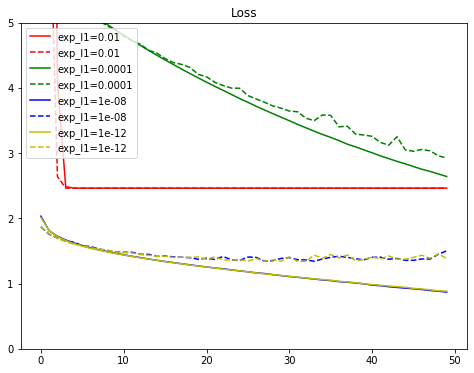

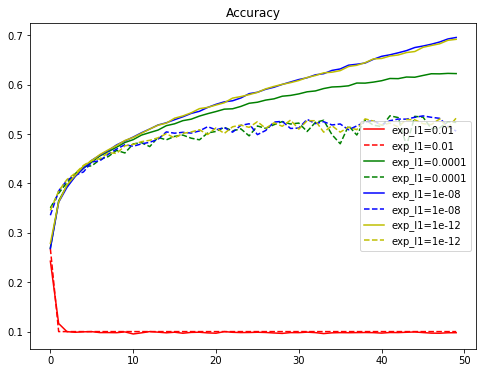

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['vali_loss'])),results[cond]['vali_loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.ylim([0, 5])
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['vali_acc'])),results[cond]['vali_acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
plt.show()